In [618]:
import pandas as pd
pd.set_option('display.float_format', '{:.20f}'.format)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

import numpy as np
import math




from sklearn.preprocessing import MinMaxScaler # normalization

#Plotting
import missingno as msno
import seaborn as sns
sns.set_theme(style="whitegrid", palette="Set2")

import matplotlib.pyplot as plt


In [229]:
df = pd.read_csv(r"C:\Users\Nicolas\Documents\ironhack_bootcamp\projects\telco_churn_project\data.xls") 
data_dict = pd.read_excel(r"C:\Users\Nicolas\Documents\ironhack_bootcamp\projects\telco_churn_project\data_dict.xlsx") 
# https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

# Machine Learning - Supervised learning - Classification

# Telco customer Churn Prediction
    This sample data module tracks a fictional telco company's customer churn based on various factors
    The data set includes information about:

    - Customers who left within the last month: the column is called Churn
    - Services that each customer has signed up for: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    - Customer account information: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    . Demographic info about customers: gender, age range, and if they have partners and dependents


In [230]:
data_dict

,Feature,Description
0,Customer ID,Contains customer ID
1,gender,Whether the customer is a male or a female
2,SeniorCitizen,"Whether the customer is a senior citizen or not (1, 0)"
3,Partner,"Whether the customer has a partner or not (Yes, No)"
4,Dependents,"Whether the customer has dependents or not (Yes, No)"
5,tenure,Number of months the customer has stayed with the company
6,PhoneService,"Whether the customer has a phone service or not (Yes, No)"
7,MultipleLines,"Whether the customer has multiple lines or not (Yes, No, No phone service)"
8,InternetService,"Customer’s internet service provider (DSL, Fiber optic, No)"
9,OnlineSecurity,"Whether the customer has online security or not (Yes, No, No internet service)"


In [231]:
def summary_statistics(df):
    """
    This function returns summary statistics for a Pandas DataFrame input. Categorical variables will have NaNs for distribution related statistics
    """
    sum_stats_df = (df.describe().round(2)).transpose().reset_index().drop(columns="count")
    describe_df = pd.concat([df.isnull().sum()/(df.shape[0]),df.isnull().sum(),df.dtypes,pd.DataFrame(df.notnull().count(),columns=["count"])],axis=1)
    describe_df = describe_df.set_axis(["null_%","null_count","dtype","count"],axis=1).reset_index()
    return pd.merge(describe_df,sum_stats_df, how="left", on="index").sort_values("dtype").set_index("index").round(2)

In [232]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [233]:
summary_statistics(df)

,null_%,null_count,dtype,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,,,,
SeniorCitizen,0.0,0,int64,7043,0.16,0.37,0.00,0.0,0.00,0.00,1.00
tenure,0.0,0,int64,7043,32.37,24.56,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,0.0,0,float64,7043,64.76,30.09,18.25,35.5,70.35,89.85,118.75
customerID,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StreamingMovies,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StreamingTV,0.0,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    Total Charges had the wrong datatype, which was hiding the presence of nulls


In [234]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ",np.nan)).astype(float)

<Axes: >

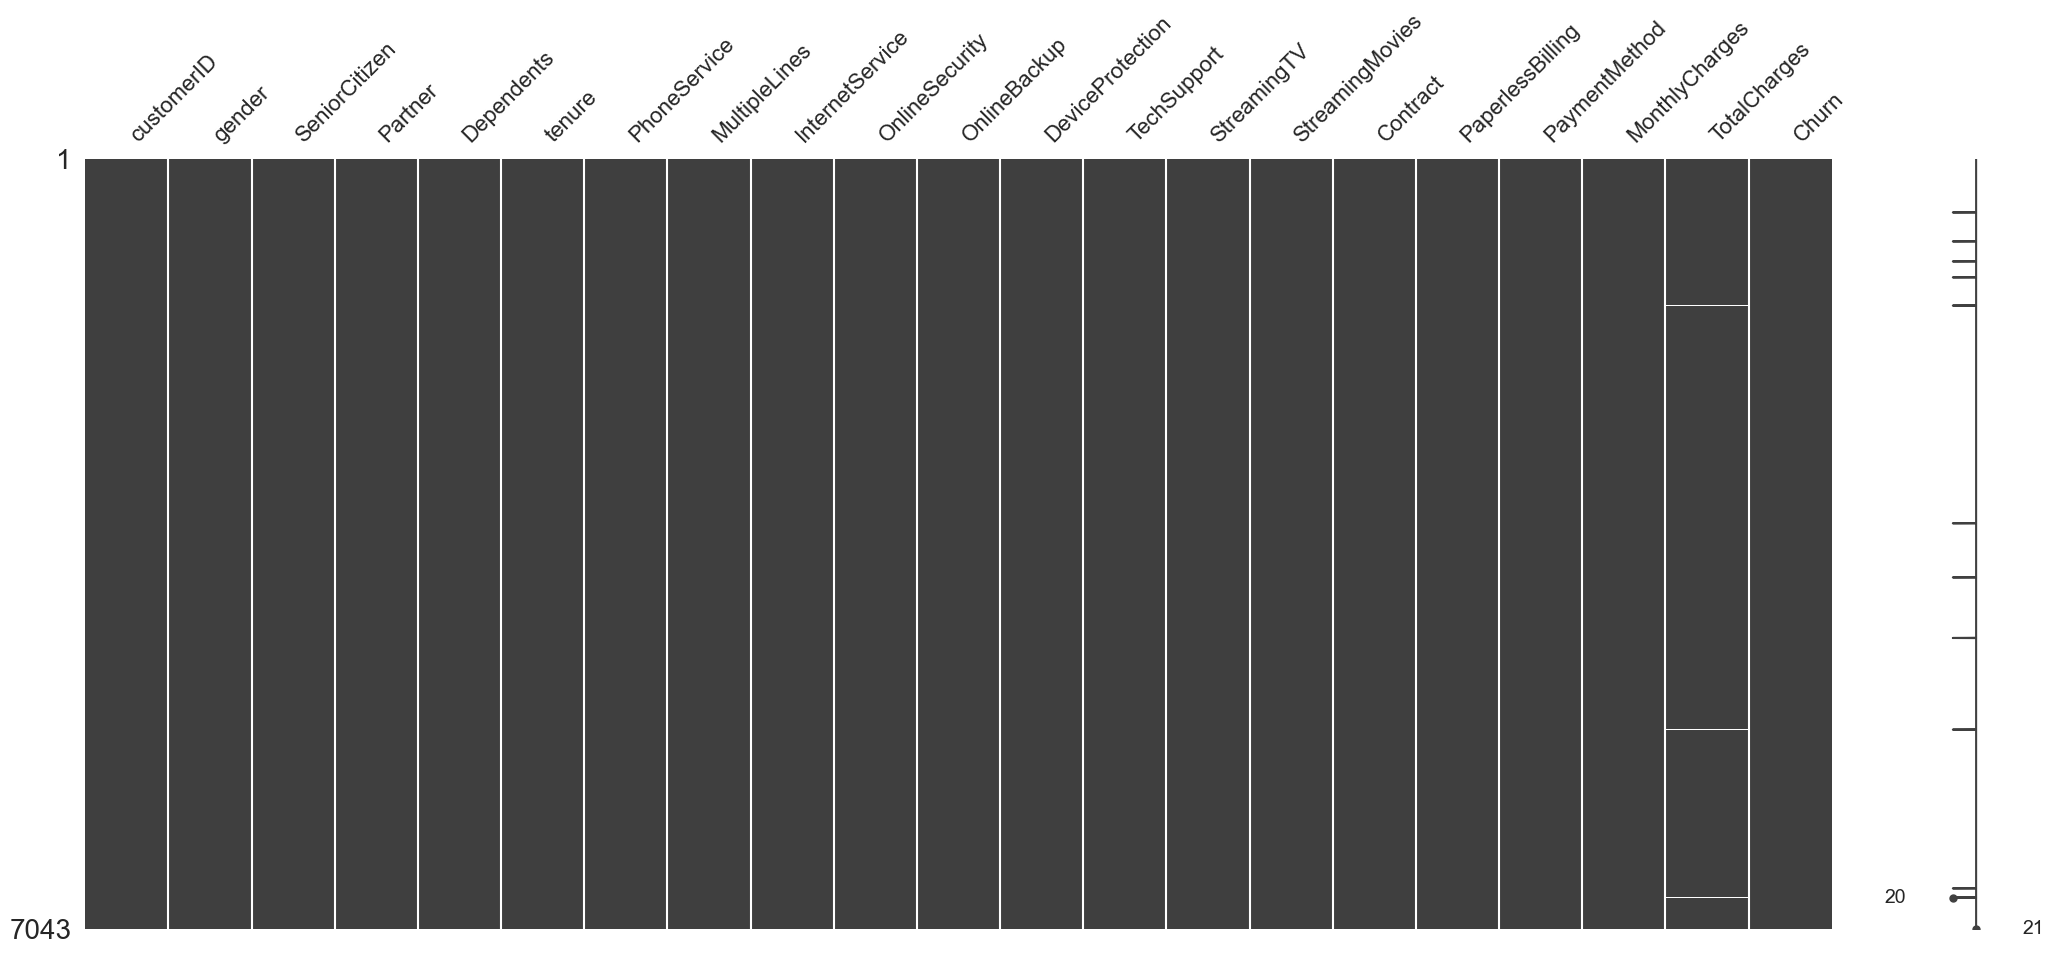

In [235]:
# missing values
msno.matrix(df)

- 7043 observations 
- There are null values in TotalCharges that will be handled using the relationship between `tenure` and `MonthlyCharges`
- Other than `tenure`, `MonthlyCharges` and `TotalCharges`, all variables are either boolean or categorical.



In [236]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ",np.nan)).astype(float)
#Given that TotalCharges should be aproximatelly monthly charges multiplied by the tenure in years, i will complete the dataset using this logic
df["TotalCharges"] = df.apply(lambda row: row["MonthlyCharges"]*row["tenure"] if (math.isnan(row["TotalCharges"])) else row["TotalCharges"],axis=1)
df["TotalCharges"].isna().sum()
#With the same reasoning, i'll check for multicollinearity between monthly changes and totalcharges afterwards

0

No duplicate rows found

In [237]:
#Duplicate Rows
print(f"{df.shape[0] - df.drop_duplicates().shape[0]} duplicate rows found")

0 duplicate rows found


In [238]:
df.drop("customerID",axis=1,inplace=True)

#### Categorical features unique values

In [239]:
val_per_feat = pd.DataFrame(list(zip([i for i in df.columns if df[i].dtype=='object'],[list(df[i].unique()) for i in df.columns if df[i].dtype=='object' ])), columns=["Feature","Values"])
val_per_feat["count_val"] = val_per_feat["Values"].apply(lambda x: len(x))
val_per_feat

,Feature,Values,count_val
0,gender,"[Female, Male]",2
1,Partner,"[Yes, No]",2
2,Dependents,"[No, Yes]",2
3,PhoneService,"[No, Yes]",2
4,MultipleLines,"[No phone service, No, Yes]",3
5,InternetService,"[DSL, Fiber optic, No]",3
6,OnlineSecurity,"[No, Yes, No internet service]",3
7,OnlineBackup,"[Yes, No, No internet service]",3
8,DeviceProtection,"[No, Yes, No internet service]",3
9,TechSupport,"[No, Yes, No internet service]",3


## Descriptive statistics

### Numerical Variables

- There are only 3 numerical variables, and there's a logical linear relationship between monthly charges , tenure and total charge
- Although MonthlyCharges*tenure < TotalCharges, will consider dropping TotalCharges if necesarry


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_29288\3188386537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop("SeniorCitizen", axis=1).corr(), annot=True, vmax=1);


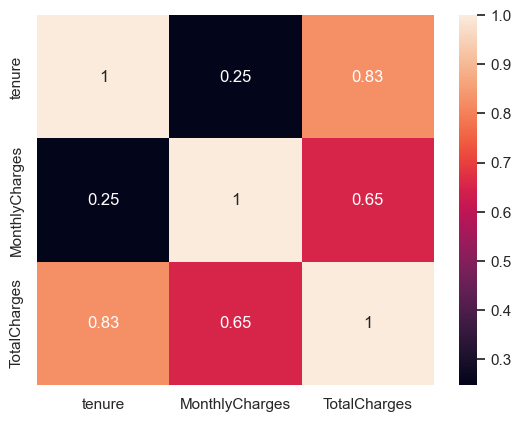

In [240]:
sns.heatmap(df.drop("SeniorCitizen", axis=1).corr(), annot=True, vmax=1);

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

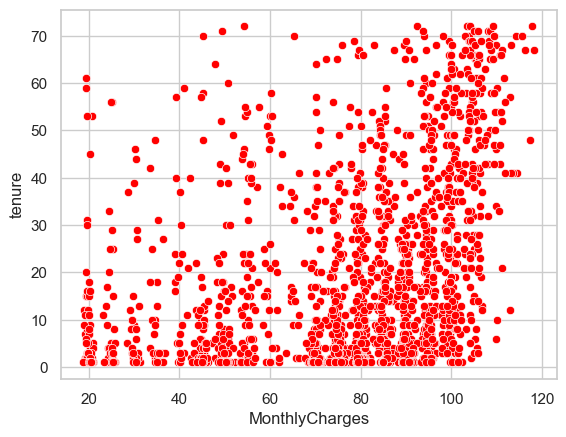

In [241]:
sns.scatterplot(df[df["Churn"]=="Yes"],x="MonthlyCharges",y="tenure",color="red")

#### No clear relationship

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

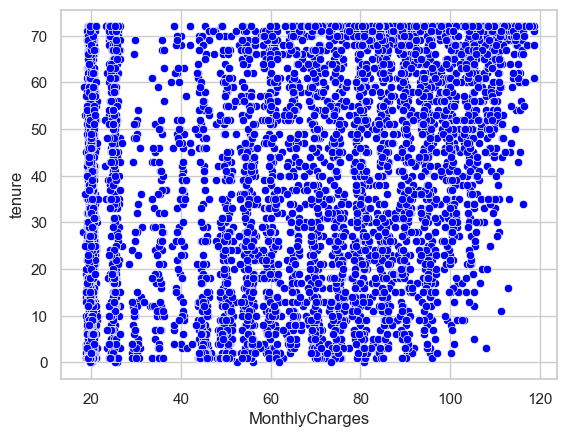

In [242]:
sns.scatterplot(df[df["Churn"]=="No"],x="MonthlyCharges",y="tenure",color="blue")

### Shapiro-Wilk test and the Anderson-Darling test (normality)

    For sample sizes larger than 5000, both tests are generally considered to be reliable and accurate, but the Anderson-Darling test tends to be more powerful and sensitive than the Shapiro-Wilk test, especially for larger sample sizes.
    Therefore, if you have a sample size larger than 5000 and you want a more powerful test, you may prefer to use the Anderson-Darling test over the Shapiro-Wilk test. 

    It is still recommended to visually inspect the data as well, such as using a histogram or Q-Q plot, to check for normality even if the statistical test indicates normality.

In [243]:
from scipy.stats import anderson

def anderson_normality_test(df):

    # Perform the Anderson-Darling test
    result = anderson(df, dist='norm')

    # Print the test statistic and critical values
    print('Test statistic:', result.statistic)
    print('Critical value at 5%:', result.critical_values[1])
    
    # Interpret the results

    if result.statistic < result.critical_values[1]:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')

#### `tenure` , not gaussian

In [244]:
anderson_normality_test(df["tenure"])

Test statistic: 203.2354707966997
Critical value at 5%: 0.656
Data does not look Gaussian (reject H0)


In [245]:
def numeric_plots(var_):

    fig, axes = plt.subplots(2, 2, figsize=(18, 10))
    fig.suptitle(f'{var_} histplot, distribution and Churn split',fontsize=20)
    fig.tight_layout(pad=5.0)
    sns.histplot(ax= axes[0,0], data =df, x=var_)
    sns.boxplot(ax= axes[0,1],data = df, x=var_)
    sns.histplot(ax= axes[1,0], data=df[df["Churn"]=="Yes"] ,x=var_ ,color= "red" )
    sns.histplot(ax= axes[1,1], data=df[df["Churn"]=="No"] ,x=var_,color= "blue" )

    axes[0, 0].set_title(f'{var_} histplot')
    axes[0, 1].set_title(f'{var_} boxplot')
    axes[1, 0].set_title("Churned Count")
    axes[1, 1].set_title("Not Churned Count")
    plt.show()

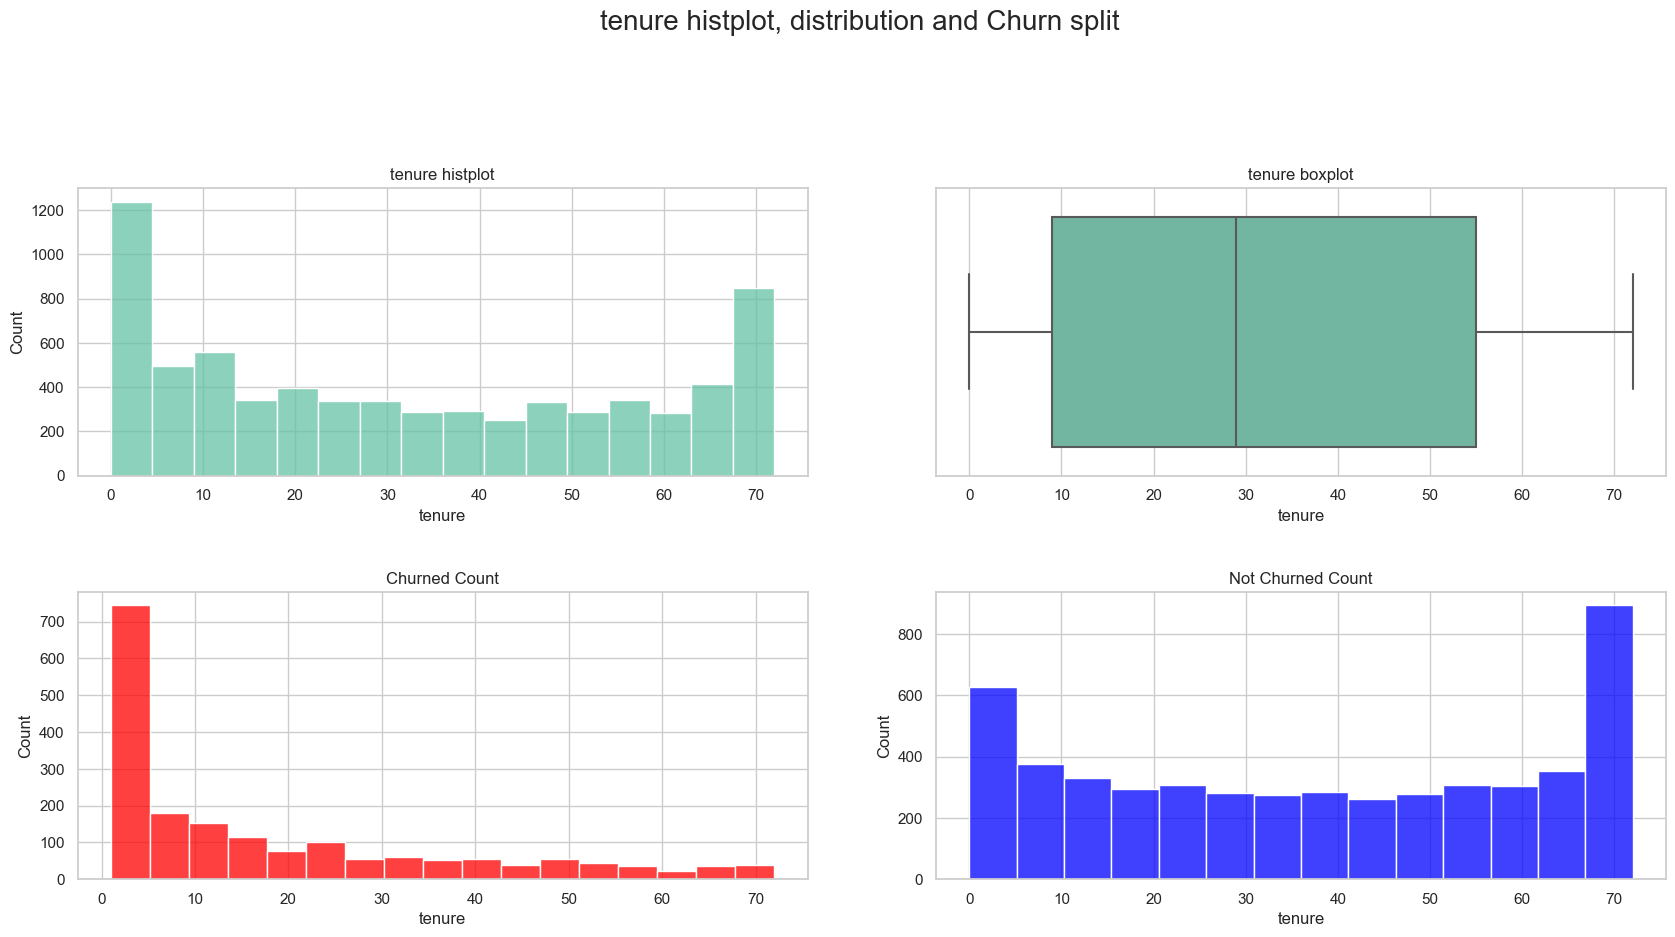

In [246]:
numeric_plots("tenure")

- distribution concentrates values on the extremes (min/max)
- There's a clear concentration on churned users on the min tenure values vs non churned users who have spikes both at min and max values
    - this suggests tenure could be a relevant feature to predict Churn

#### `MonthlyCharges` , not gaussian

In [247]:
anderson_normality_test(df["MonthlyCharges"])

Test statistic: 170.555235072914
Critical value at 5%: 0.656
Data does not look Gaussian (reject H0)


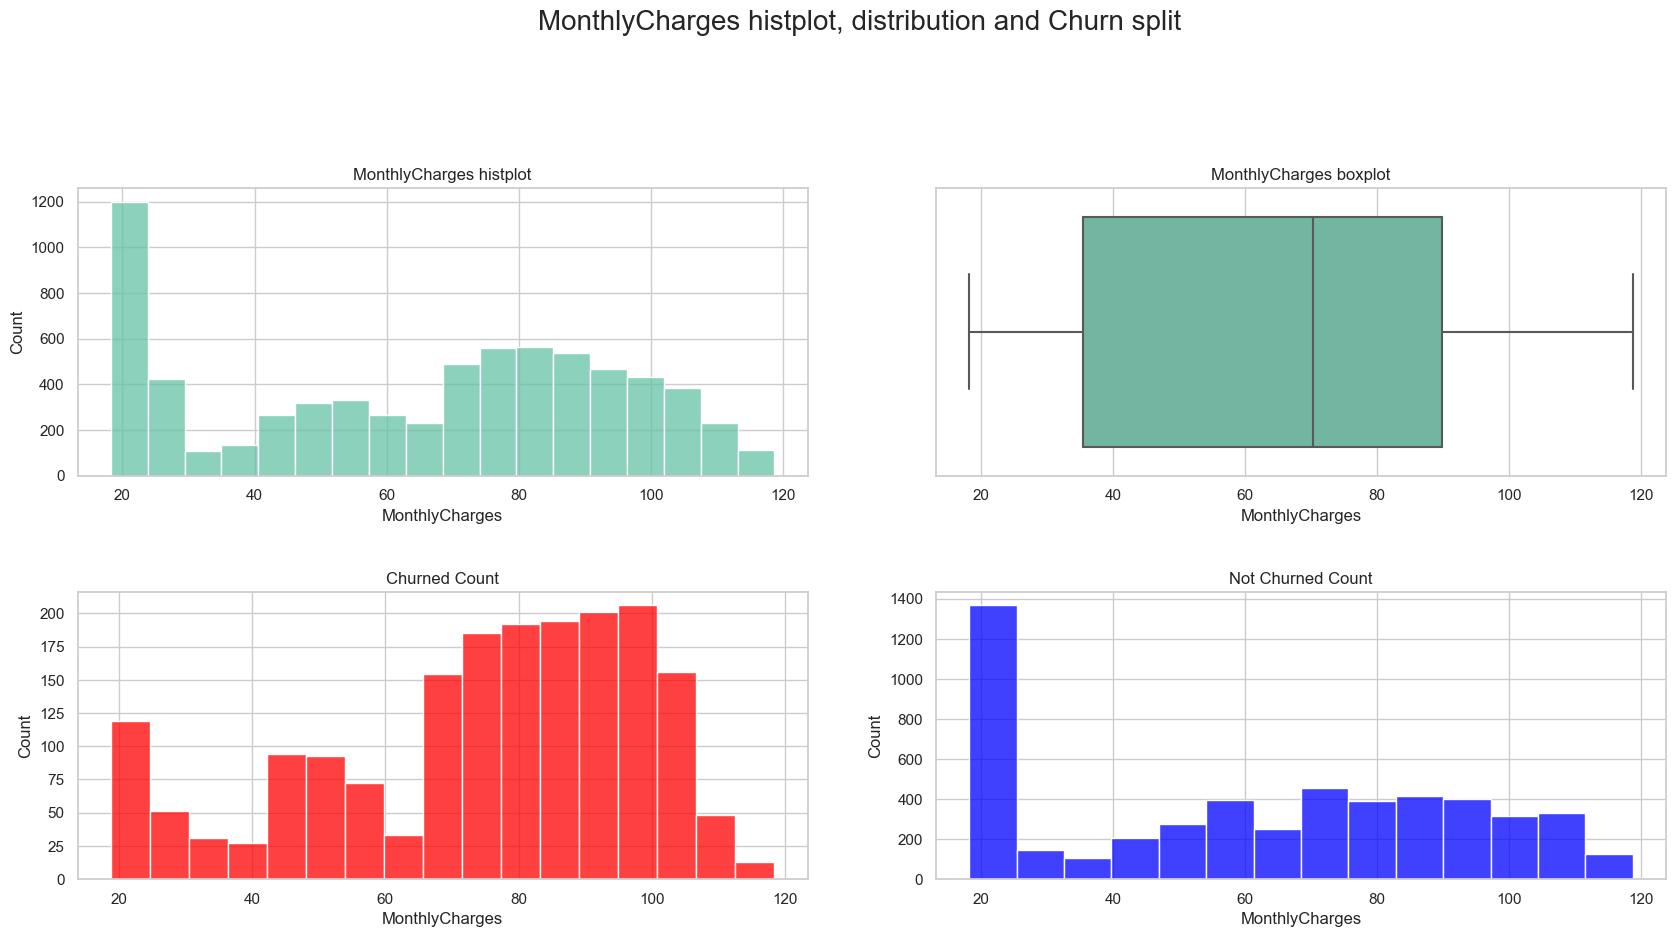

In [248]:
numeric_plots("MonthlyCharges")

- There's concentration or churned users within the 60-110 monthly charges rate, seems relevant to segment clients correctly in order to address clients with a higher price-sensitivity in a more personalized way

#### `TotalCharges` , not gaussian

In [249]:
anderson_normality_test(df["TotalCharges"])

Test statistic: 346.6380297042033
Critical value at 5%: 0.656
Data does not look Gaussian (reject H0)


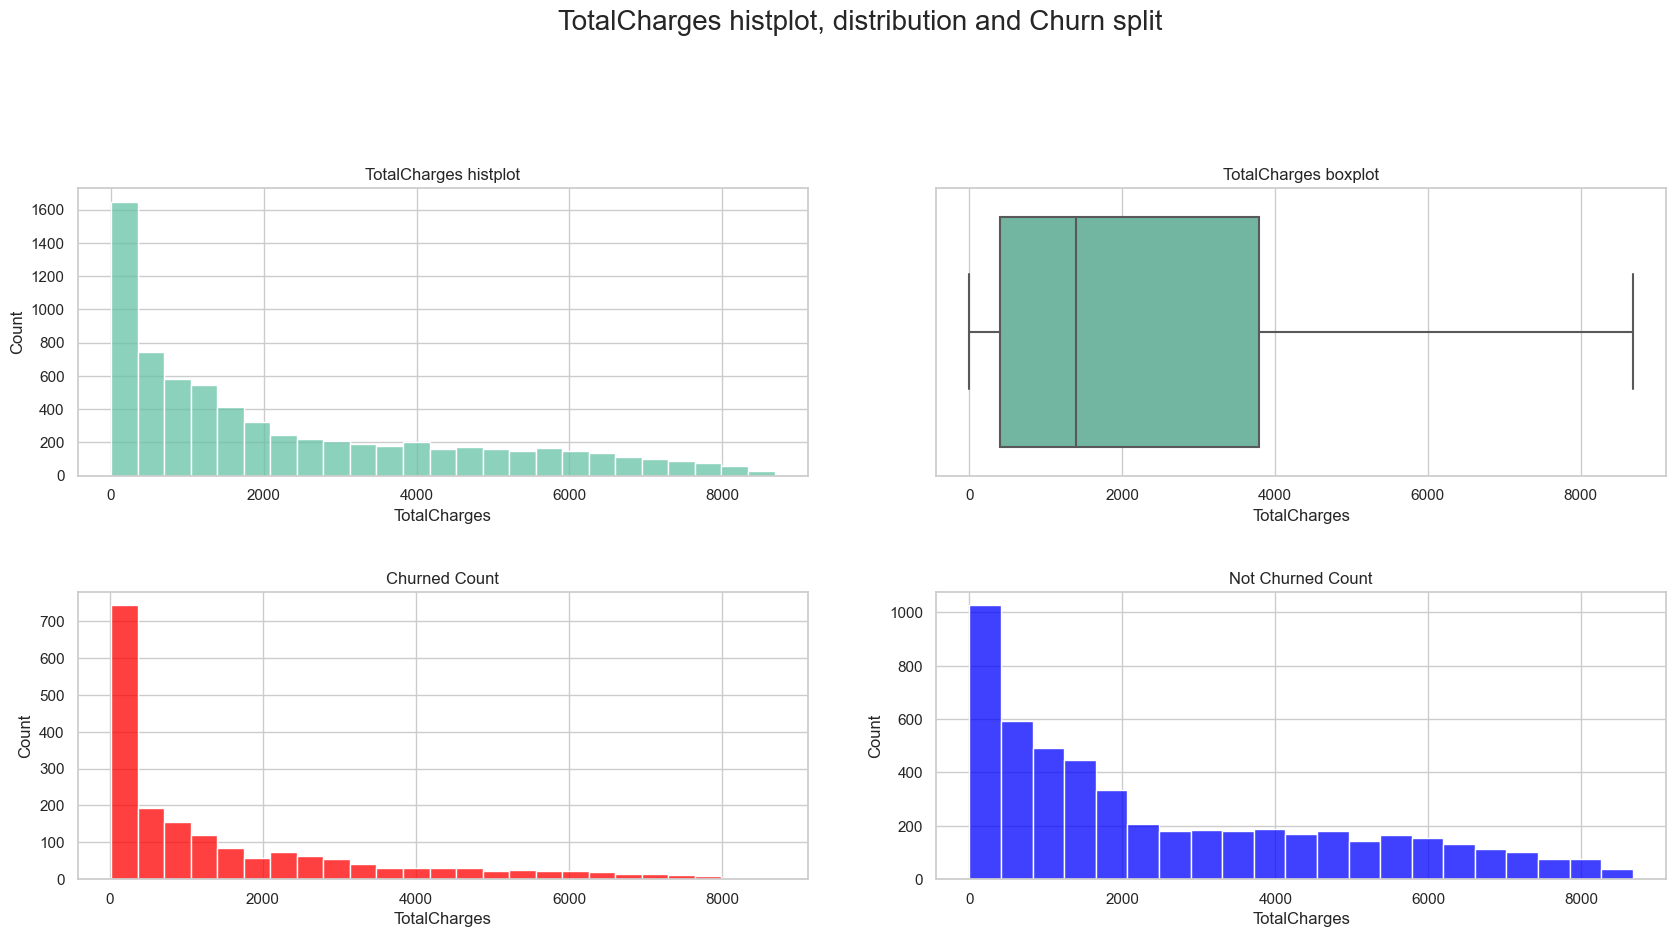

In [250]:
numeric_plots("TotalCharges")

#### `ExtraChargesEstimate` , gaussian

In [251]:
df["ExtraChargesEstimate"] = (df["TotalCharges"]-df["MonthlyCharges"]*df["tenure"])/12

In [252]:
anderson_normality_test(df["ExtraChargesEstimate"])

Test statistic: 130.869284893427
Critical value at 5%: 0.656
Data does not look Gaussian (reject H0)


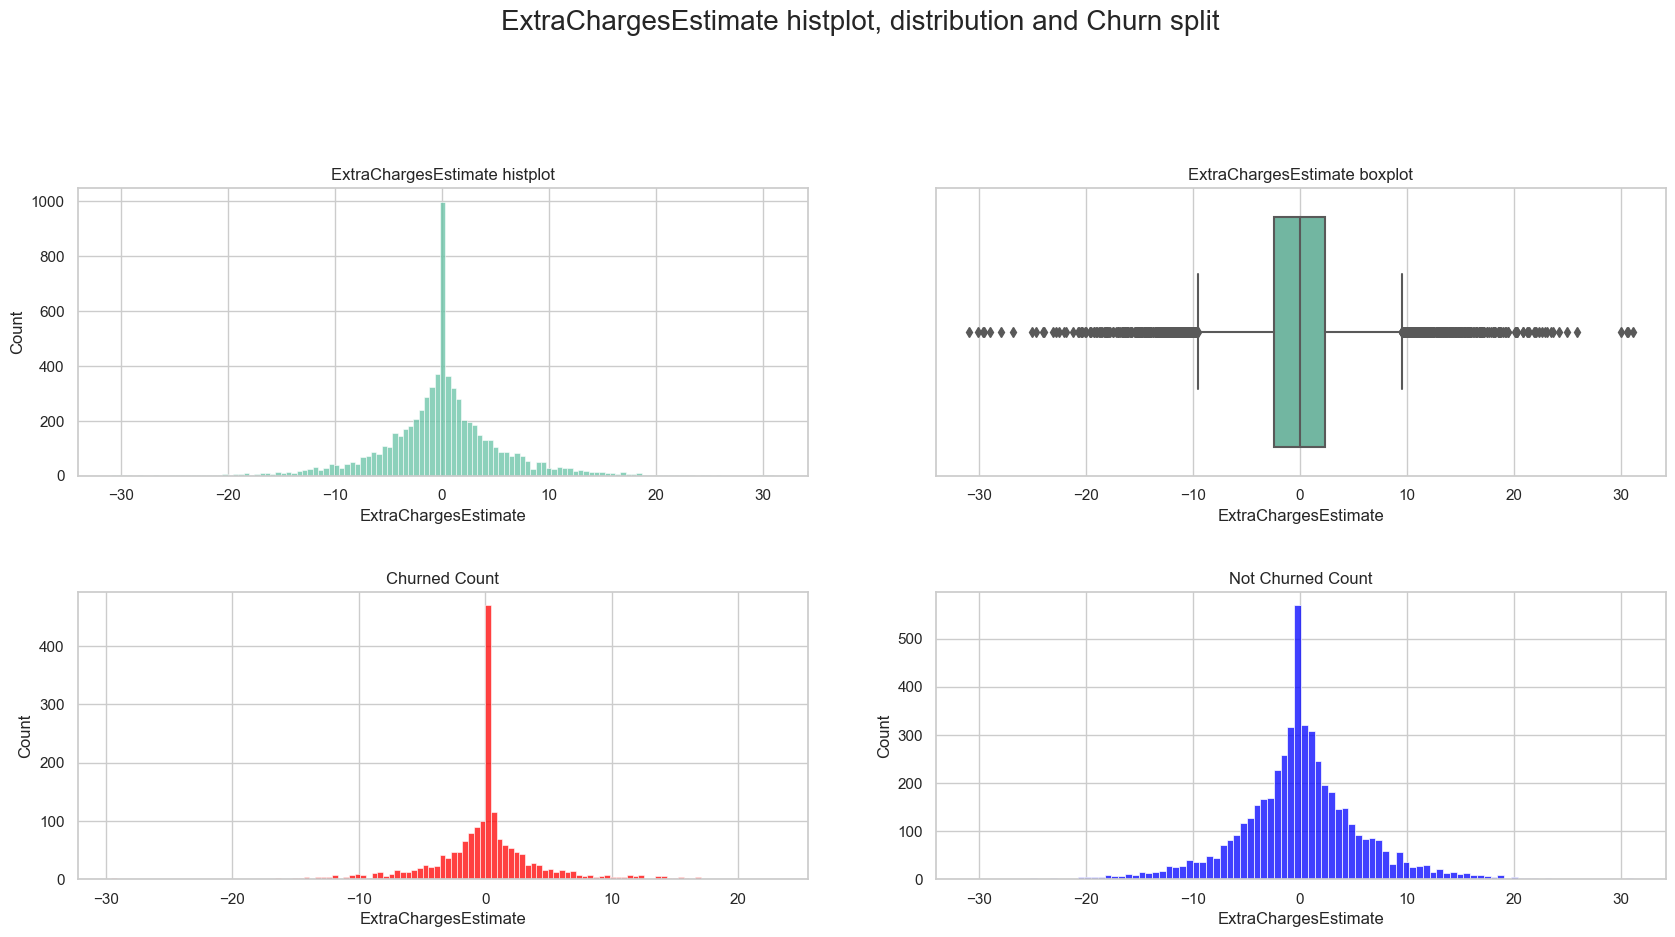

In [253]:

numeric_plots("ExtraChargesEstimate")
 

In [254]:
from scipy.stats import normaltest


# perform normality test
stat, p = normaltest(df["ExtraChargesEstimate"])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

Data is not normally distributed


In [255]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p = shapiro(df["ExtraChargesEstimate"])

# Print the test statistic and p-value
print('Test statistic:', stat)
print('p-value:', p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Test statistic: 0.9449524879455566
p-value: 2.802596928649634e-45
Data does not look Gaussian (reject H0)


c:\Users\Nicolas\miniconda3\envs\ironhack\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Scaling    
    
    StandardScaler: This scaler transforms the data such that its distribution will have a mean of 0 and a standard deviation of 1. It is a good choice when the data has a Gaussian or normal distribution.

    MinMaxScaler: This scaler scales the data to a fixed range of 0 to 1. It is suitable for data that has a bounded range, for example, image pixel intensities.

    MaxAbsScaler: This scaler scales the data to the range of -1 to 1 by dividing each value by the maximum absolute value in the data. It is suitable for data that has both positive and negative values.

    RobustScaler: This scaler scales the data based on the median and interquartile range, which makes it more robust to outliers in the data. It is a good choice when the data contains outliers.

    PowerTransformer: This scaler applies a mathematical transformation to the data to make it more Gaussian-like. It is useful when the data does not follow a normal distribution.

    QuantileTransformer: This scaler transforms the data to follow a uniform or a normal distribution. It is useful when the data does not follow a normal distribution and when there are outliers.

In [256]:
# will probably try MinMaxScaler and MaxAbsScaler, given that the data is positive, non-Gaussian, and mainly concentrated in the minimum and/or maximum values

### Target Variable:

In [273]:
df.Churn.value_counts(normalize=True).reset_index()

,index,Churn
0,No,0.73463
1,Yes,0.26537


<Axes: xlabel='index', ylabel='Churn'>

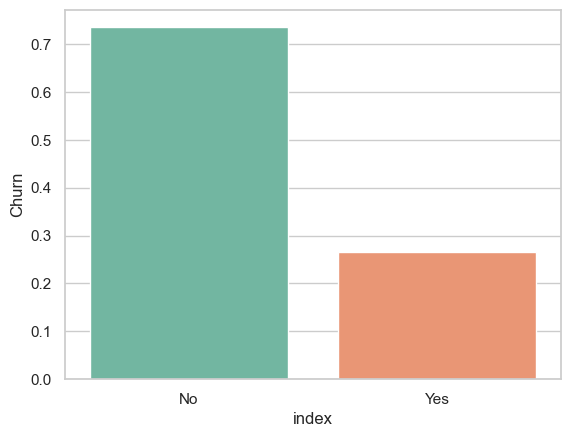

In [274]:
sns.barplot(data=df.Churn.value_counts(normalize=True).reset_index(), x="index", y="Churn")

### Categorical Encoding (More than 1 possible option)


In [258]:
# Dropping one option in binary categorical features to avoid multicollinearity when training the model
bool_list = ["gender_Female","Partner_No","Dependents_No","PhoneService_No","PaperlessBilling_No","Churn_No","TotalCharges"]
df_num = pd.get_dummies(df).drop(bool_list,axis=1)

In [259]:
df_num

,SeniorCitizen,tenure,MonthlyCharges,ExtraChargesEstimate,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,0.000000,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,0,34,56.95,-3.900000,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,2,53.85,0.037500,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1
3,0,45,42.30,-5.229167,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,0.854167,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,-3.725000,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
7039,0,72,103.20,-5.625000,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0
7040,0,11,29.60,1.737500,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7041,1,4,74.40,0.750000,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1


In [260]:
scaler = MinMaxScaler()

In [261]:
feat_scale = ["tenure","MonthlyCharges","ExtraChargesEstimate"]

for i in list(feat_scale):
    df_num[i] = scaler.fit_transform(df[i].values.reshape(-1, 1))

In [262]:
df_num

,SeniorCitizen,tenure,MonthlyCharges,ExtraChargesEstimate,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.013889,0.115423,0.498387,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,0,0.472222,0.385075,0.435493,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,0.027778,0.354229,0.498992,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1
3,0,0.625000,0.239303,0.414057,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,0,0.027778,0.521891,0.512162,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.438315,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
7039,0,1.000000,0.845274,0.407674,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0
7040,0,0.152778,0.112935,0.526408,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7041,1,0.055556,0.558706,0.510482,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1


### The imbalance problem:

    This classification task has a clear problem: the number of churned customers is much smaller than the number of non-churned customers. This can lead to biased models that predict the majority class more frequently. Several techniques such as oversampling, undersampling, and cost-sensitive learning will be analyzed to mitigate this problem and improve the accuracy of the models.

### Oversampling/Undersampling 
    Oversampling - 3 possible options: Base scenario (no Over-Sampling), sampling_strategy=0.5 ,sampling_strategy=1
    Undersampling - 

#### SMOTE 

    SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm for oversampling imbalanced datasets, which involves creating synthetic examples of the minority class to balance the number of examples between classes.

    SMOTE works by generating synthetic examples in feature space rather than simply duplicating existing examples. It does this by selecting a minority class example at random and finding its k-nearest neighbors (usually k=5), then randomly selecting one of the neighbors and interpolating a new example between the two. The new example is created by selecting random values for each feature between the two examples and is added to the dataset as a new example of the minority class.

    The oversampling ratio of the minority class can be controlled using the sampling_strategy parameter in the SMOTE function. For example, setting sampling_strategy=0.5 will create new examples until the minority class is at 50% of the size of the majority class.

#### UnderSampling

    Random undersampling is a technique used to balance the class distribution by removing some examples from the majority class at random until the desired balance is achieved.

    RandomUnderSampler works by randomly selecting a subset of examples from the majority class that is equal in size to the minority class, thereby creating a balanced dataset. This can be done either by specifying the desired sampling ratio, or by setting the sampling strategy to 'auto' which will undersample the majority class to the size of the minority class.

    in this case, i'll undersample the majority class to the size of the minority class.

Over/under sampling should only be done on the training data, and not on the test or validation data. The reason for this is to avoid introducing bias into the model evaluation process and to ensure that the model's performance on unseen data is accurately estimated.

In [308]:
from sklearn.model_selection import train_test_split

X = df_num.drop('Churn_Yes', axis=1)  # Features
y = df_num['Churn_Yes']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [310]:
from imblearn.over_sampling import SMOTE

In [311]:
oversample = SMOTE(sampling_strategy=0.5)
X_resampled_05, y_resampled_05 = oversample.fit_resample(X_train, y_train)

In [312]:
oversample = SMOTE()
X_resampled_1, y_resampled_1 = oversample.fit_resample(X_train, y_train)

<Axes: xlabel='Churn_Yes', ylabel='count'>

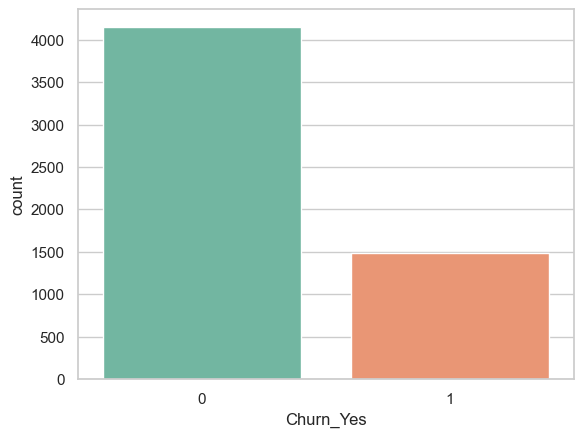

In [313]:
sns.countplot(x=y_train)

<Axes: xlabel='Churn_Yes', ylabel='count'>

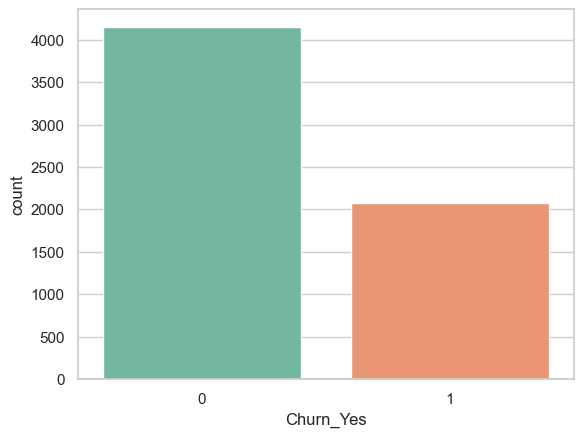

In [314]:
sns.countplot(x=y_resampled_05)

<Axes: xlabel='Churn_Yes', ylabel='count'>

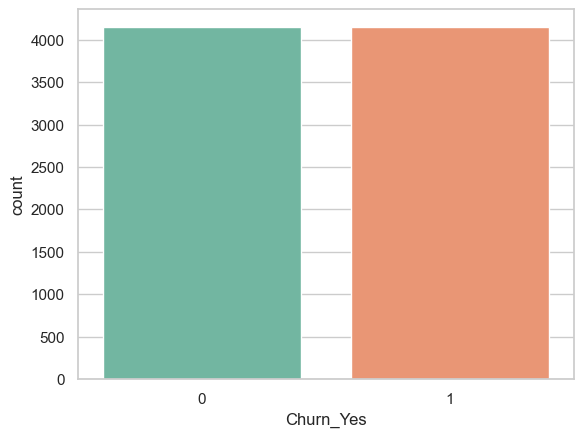

In [315]:
sns.countplot(x=y_resampled_1)

<Axes: xlabel='Churn_Yes', ylabel='count'>

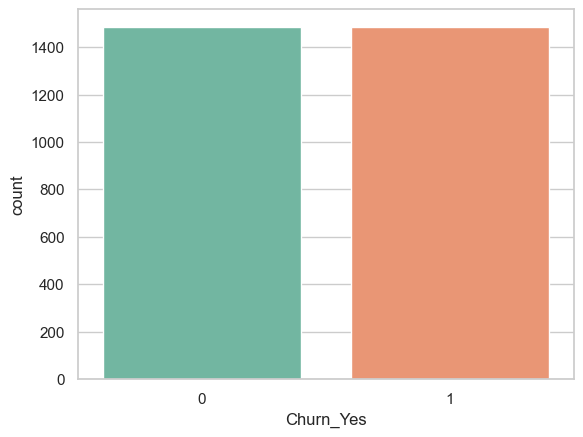

In [316]:
from imblearn.under_sampling import RandomUnderSampler

X_undersampled, y_undersampled = RandomUnderSampler().fit_resample(X_train, y_train)

sns.countplot(x=y_undersampled)

In [758]:

model_list = [LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
model_list = [LogisticRegression()]
sample_train_labels = ["NoResampling","Oversampling1","Oversampling05","Undersampling"]
X_train_options = [X_train,X_resampled_1,X_resampled_05,X_undersampled]
y_train_options = [y_train,y_resampled_1,y_resampled_05,y_undersampled]
train_options = list(zip(X_train_options,y_train_options))


## Modelling 

#### Classification report    
    
    Precision: the proportion of predicted positive instances that are actually positive. It measures the model's accuracy in predicting positive instances.

    Recall: the proportion of actual positive instances that are correctly predicted as positive. It measures the model's completeness in predicting positive instances.

    F1-score: the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall.

    Support: the number of instances of each class in the true labels.

The overall accuracy of the model can be inferred from the macro/micro averages of the precision, recall and f1-score metrics.

### Metric: ROC AUC

    ROC AUC (Receiver Operating Characteristic Area Under Curve) is a performance metric commonly used in binary classification problems to evaluate the ability of a model to distinguish between positive and negative classes.

    ROC AUC is a measure of the model's ability to correctly rank true positives (TP) higher than false positives (FP) across a range of decision thresholds. The ROC curve is a graphical representation of the trade-off between sensitivity (true positive rate) and specificity (true negative rate) as the decision threshold for classification is varied. The AUC is the area under this curve and provides a single scalar value to summarize the overall performance of the model.

    ROC AUC ranges from 0.0 to 1.0, with higher values indicating better performance. An AUC of 0.5 indicates that the model is no better than random guessing, while an AUC of 1.0 indicates perfect performance.

    ROC AUC is a useful metric because it is insensitive to class imbalance and is interpretable across different decision thresholds. It can also be used to compare the performance of different models on the same dataset.

#### Base scenario: Logistic regression

In [747]:
model = LogisticRegression()
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [748]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression


roc_list = []
accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []


for x,y in train_options:
        result = model.fit(x, y)
        y_pred = result.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'ROC AUC Score:{roc_auc}','\n',pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)))
        roc_list.append(roc_auc)
        accuracy_score_list.append(accuracy_score(y_test, y_pred))
        precision_score_list.append(precision_score(y_test, y_pred))
        recall_score_list.append(recall_score(y_test, y_pred))
        f1_score_list.append(f1_score(y_test, y_pred))
        

ROC AUC Score:0.861037855691057 
                                   0                        1  \
precision    0.83771532184950137090   0.66993464052287576838   
recall       0.90146341463414636497   0.53385416666666662966   
f1-score     0.86842105263157898243   0.59420289855072461194   
support   1025.00000000000000000000 384.00000000000000000000   

                        accuracy                 macro avg  \
precision 0.80127750177430800971    0.75382498118618856964   
recall    0.80127750177430800971    0.71765879065040649731   
f1-score  0.80127750177430800971    0.73131197559115179718   
support   0.80127750177430800971 1409.00000000000000000000   

                       weighted avg  
precision    0.79198942999043520086  
recall       0.80127750177430800971  
f1-score     0.79368736124261662912  
support   1409.00000000000000000000  
ROC AUC Score:0.8630805386178861 
                                   0                        1  \
precision    0.88761706555671171515   0.61607

In [752]:
aux_roc_auc_df = pd.DataFrame({"sampling":sample_train_labels,"ROC_AUC":roc_list,"accuracy":accuracy_score_list,"precision":precision_score_list,"recall":recall_score_list,"f1_score":f1_score_list})
aux_roc_auc_df["model"]= type(model).__name__
aux_roc_auc_df["params"]=np.nan
opt_samp= aux_roc_auc_df["sampling"][aux_roc_auc_df["ROC_AUC"]==aux_roc_auc_df["ROC_AUC"].max()].index[0]

roc_auc_df = roc_auc_df.append(aux_roc_auc_df)

In [750]:
params= {
    'penalty': ['l1', 'l2',None],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000, 10000]
}

# Create a logistic regression model
model = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(model, params, scoring='roc_auc', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_options[opt_samp], y_train_options[opt_samp])

# Predict probabilities on the test set using the best estimator found by the grid search
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score using the best estimator found by the grid search
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Best parameters:", grid_search.best_params_)
print("ROC AUC score:", roc_auc)

Best parameters:
ROC AUC score: 0.8634032012195121


In [753]:
roc_auc_df = roc_auc_df.append(pd.DataFrame(["gridsearch",roc_auc,accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),type(model).__name__,grid_search.best_params_],index=roc_auc_df.columns).transpose())

In [754]:
roc_auc_df

,sampling,ROC_AUC,accuracy,precision,recall,f1_score,model,params
0,NoResampling,0.86103785569105695252,0.80127750177430800971,0.66993464052287576838,0.53385416666666662966,0.59420289855072461194,LogisticRegression,NaN
1,Oversampling1,0.86308053861788613936,0.80127750177430800971,0.61607142857142860315,0.71875000000000000000,0.66346153846153843592,LogisticRegression,NaN
2,Oversampling05,0.86273755081300806946,0.80695528743789923798,0.65469613259668513194,0.61718750000000000000,0.63538873994638078724,LogisticRegression,NaN
3,Undersampling,0.85858612804878053915,0.77004968062455647626,0.55263157894736847364,0.82031250000000000000,0.66037735849056600212,LogisticRegression,NaN
0,gridsearch,0.86340320121951208421,0.77004968062455647626,0.55263157894736847364,0.82031250000000000000,0.66037735849056600212,LogisticRegression,"{'C': 10.0, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}"


### Feature reduction

In [755]:
roc_list = []
accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []
feat_importance_thresh_list = [0.2,0.15,0.1,0.05,0.01]
from sklearn.feature_selection import SelectFromModel

for i in feat_importance_thresh_list:
    params = grid_search.best_params_

    model = LogisticRegression(**params)

    sfm = SelectFromModel(model, threshold=i)
    X_reduced = sfm.fit_transform(X_resampled_1, y_resampled_1)
    result = model.fit(X_reduced, y_resampled_1)

    X_test_reduced = sfm.transform(X_test)
    y_pred = result.predict(X_test_reduced) 

    y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_list.append(roc_auc)
    accuracy_score_list.append(accuracy_score(y_test, y_pred))
    precision_score_list.append(precision_score(y_test, y_pred))
    recall_score_list.append(recall_score(y_test, y_pred))
    f1_score_list.append(f1_score(y_test, y_pred))
    print(f'ROC AUC Score:{roc_auc}','\n',classification_report(y_test, y_pred))

ROC AUC Score:0.863170731707317 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1025
           1       0.63      0.71      0.66       384

    accuracy                           0.80      1409
   macro avg       0.76      0.77      0.76      1409
weighted avg       0.81      0.80      0.81      1409

ROC AUC Score:0.8631275406504065 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1025
           1       0.62      0.71      0.66       384

    accuracy                           0.80      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.81      0.80      0.81      1409

ROC AUC Score:0.863972306910569 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1025
           1       0.63      0.71      0.66       384

    accuracy                           0.80      1409
   macro avg       0.76  

In [756]:
sample_it_result = pd.DataFrame({"sampling":"feature_reduction","ROC_AUC":roc_list,"accuracy":accuracy_score_list,"precision":precision_score_list,"recall":recall_score_list,"f1_score":f1_score_list,"model":type(model).__name__,"params":feat_importance_thresh_list})
opt_samp= sample_it_result[sample_it_result["ROC_AUC"]==sample_it_result["ROC_AUC"].max()]
roc_auc_df = roc_auc_df.append(opt_samp)
roc_auc_df.sort_values("ROC_AUC")


,sampling,ROC_AUC,accuracy,precision,recall,f1_score,model,params
3,Undersampling,0.85858612804878053915,0.77004968062455647626,0.55263157894736847364,0.82031250000000000000,0.66037735849056600212,LogisticRegression,NaN
0,NoResampling,0.86103785569105695252,0.80127750177430800971,0.66993464052287576838,0.53385416666666662966,0.59420289855072461194,LogisticRegression,NaN
2,Oversampling05,0.86273755081300806946,0.80695528743789923798,0.65469613259668513194,0.61718750000000000000,0.63538873994638078724,LogisticRegression,NaN
1,Oversampling1,0.86308053861788613936,0.80127750177430800971,0.61607142857142860315,0.71875000000000000000,0.66346153846153843592,LogisticRegression,NaN
0,gridsearch,0.86340320121951208421,0.77004968062455647626,0.55263157894736847364,0.82031250000000000000,0.66037735849056600212,LogisticRegression,"{'C': 10.0, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}"
2,feature_reduction,0.86397230691056903229,0.80482611781405255513,0.62586605080831403392,0.70572916666666662966,0.66340269277845764773,LogisticRegression,0.10000000000000000555


In [763]:
roc_auc_df

for i in model_list:
    roc_list = []
    accuracy_score_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []

    model = i
    for x,y in train_options:
        result = model.fit(x, y)
        y_pred = result.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_list.append(roc_auc)
        accuracy_score_list.append(accuracy_score(y_test, y_pred))
        precision_score_list.append(precision_score(y_test, y_pred))
        recall_score_list.append(recall_score(y_test, y_pred))
        f1_score_list.append(f1_score(y_test, y_pred))


    
    ### Storing no params in DF ################################################################################################
    aux_roc_auc_df = pd.DataFrame({"sampling":sample_train_labels,"ROC_AUC":roc_list,"accuracy":accuracy_score_list,"precision":precision_score_list,"recall":recall_score_list,"f1_score":f1_score_list})
    aux_roc_auc_df["model"]= type(model).__name__
    aux_roc_auc_df["params"]=np.nan
    opt_samp= aux_roc_auc_df["sampling"][aux_roc_auc_df["ROC_AUC"]==aux_roc_auc_df["ROC_AUC"].max()].index[0]

    roc_auc_df = roc_auc_df.append(aux_roc_auc_df)

## PIPELINE

In [765]:
roc_auc_df = pd.DataFrame({"sampling":[],"ROC_AUC":[],"accuracy":[],"precision":[],"recall":[],"f1_score":[]})

for i in model_list:
    roc_list = []
    accuracy_score_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []

    model = i
    for x,y in train_options:
        result = model.fit(x, y)
        y_pred = result.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_list.append(roc_auc)
        accuracy_score_list.append(accuracy_score(y_test, y_pred))
        precision_score_list.append(precision_score(y_test, y_pred))
        recall_score_list.append(recall_score(y_test, y_pred))
        f1_score_list.append(f1_score(y_test, y_pred))


    
    ### Storing no params in DF ################################################################################################
    aux_roc_auc_df = pd.DataFrame({"sampling":sample_train_labels,"ROC_AUC":roc_list,"accuracy":accuracy_score_list,"precision":precision_score_list,"recall":recall_score_list,"f1_score":f1_score_list})
    aux_roc_auc_df["model"]= type(model).__name__
    aux_roc_auc_df["params"]=np.nan
    opt_samp= aux_roc_auc_df["sampling"][aux_roc_auc_df["ROC_AUC"]==aux_roc_auc_df["ROC_AUC"].max()].index[0]

    roc_auc_df = roc_auc_df.append(aux_roc_auc_df)

    ### Gridsearch ################################################################################################################

    params= {
    'penalty': ['l1', 'l2',None],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000, 10000]
        }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(model, params, scoring='roc_auc', cv=5)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train_options[opt_samp], y_train_options[opt_samp])

    # Predict probabilities on the test set using the best estimator found by the grid search
    y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    # Calculate the ROC AUC score using the best estimator found by the grid search
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    ### Storing gridsearch in DF ################################################################################################

    roc_auc_df = roc_auc_df.append(pd.DataFrame(["gridsearch",roc_auc,accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),type(model).__name__,grid_search.best_params_],index=roc_auc_df.columns).transpose())

    ### Feature Reduction ########################################################################################################

    roc_list = []
    accuracy_score_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []
    feat_importance_thresh_list = [0.2,0.15,0.1,0.05,0.01]
    from sklearn.feature_selection import SelectFromModel

    for i in feat_importance_thresh_list:
        params = grid_search.best_params_

        model.set_params(**params)

        sfm = SelectFromModel(model, threshold=i)
        X_reduced = sfm.fit_transform(X_resampled_1, y_resampled_1)
        result = model.fit(X_reduced, y_resampled_1)

        X_test_reduced = sfm.transform(X_test)
        y_pred = result.predict(X_test_reduced) 

        y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_list.append(roc_auc)
        accuracy_score_list.append(accuracy_score(y_test, y_pred))
        precision_score_list.append(precision_score(y_test, y_pred))
        recall_score_list.append(recall_score(y_test, y_pred))
        f1_score_list.append(f1_score(y_test, y_pred))
        
    ### Storing feature reduction in DF ################################################################################################

    sample_it_result = pd.DataFrame({"sampling":"feature_reduction","ROC_AUC":roc_list,"accuracy":accuracy_score_list,"precision":precision_score_list,"recall":recall_score_list,"f1_score":f1_score_list,"model":type(model).__name__,"params":feat_importance_thresh_list})
    opt_samp= sample_it_result[sample_it_result["ROC_AUC"]==sample_it_result["ROC_AUC"].max()]
    roc_auc_df = roc_auc_df.append(opt_samp)
    roc_auc_df.sort_values("ROC_AUC")
        

In [766]:
roc_auc_df

,sampling,ROC_AUC,accuracy,precision,recall,f1_score,model,params
0,NoResampling,0.86100736788617882045,0.80340667139815469255,0.67313915857605177706,0.54166666666666662966,0.60028860028860031584,LogisticRegression,NaN
1,Oversampling1,0.86340320121951219523,0.80553584102200137540,0.62672811059907829190,0.70833333333333337034,0.66503667481662587235,LogisticRegression,NaN
2,Oversampling05,0.86308561991869914287,0.80766501064584816927,0.66096866096866091489,0.60416666666666662966,0.63129251700680266701,LogisticRegression,NaN
3,Undersampling,0.85842860772357720833,0.77217885024840315911,0.55555555555555558023,0.82031250000000000000,0.66246056782334383772,LogisticRegression,NaN
0,gridsearch,0.86340320121951219523,0.77217885024840315911,0.55555555555555558023,0.82031250000000000000,0.66246056782334383772,LogisticRegression,"{'C': 10.0, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}"
2,feature_reduction,0.86397230691056903229,0.80482611781405255513,0.62586605080831403392,0.70572916666666662966,0.66340269277845764773,LogisticRegression,0.10000000000000000555


## Alternative models to test:

    Random Forest: This is an ensemble of decision trees that can handle categorical data well and has good performance on imbalanced datasets. It works by building multiple decision trees on random subsets of the data and combining their predictions to make a final prediction.

    Gradient Boosted Trees: This is another ensemble of decision trees that works by building decision trees sequentially, where each subsequent tree is trained to correct the errors of the previous tree. This can result in improved performance compared to Random Forests, but may require more tuning to optimize performance.

    XGBoost: This is a popular implementation of gradient boosted trees that has been shown to be effective on a wide range of classification problems. It has many customizable parameters that allow for fine-tuning of model performance.

    CatBoost: This is another implementation of gradient boosted trees that is specifically designed to handle categorical data. It has a unique algorithm for processing categorical data that can handle high-cardinality features (i.e., features with many categories).

These models can handle the high proportion of categorical features in your data and can also deal with imbalanced data by using techniques such as weighting, oversampling, or undersampling. Additionally, they are generally easy to interpret, which can be important for understanding the factors that are driving your predictions.

### Random Forest Classifier

In [419]:
from sklearn.ensemble import RandomForestClassifier

roc_auc_list = []

# Create the model object
rf = RandomForestClassifier()

for x,y in train_options:
        result = rf.fit(x, y)
        y_pred = result.predict(X_test)
        y_pred_proba = rf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_auc_list.append(roc_auc)
        print(f'ROC AUC Score:{roc_auc}','\n',classification_report(y_test, y_pred))

ROC AUC Score:0.8295947662601627 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1025
           1       0.65      0.48      0.55       384

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

ROC AUC Score:0.8341526930894311 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1025
           1       0.60      0.64      0.62       384

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409

ROC AUC Score:0.8319131097560974 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1025
           1       0.62      0.54      0.58       384

    accuracy                           0.78      1409
   macro avg       0.73

In [420]:
roc_auc_list

[0.8295947662601627,
 0.8341526930894311,
 0.8319131097560974,
 0.8378290142276423]

In [410]:
from sklearn.metrics import make_scorer, recall_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,4]
}

# Define the scorer to use for grid search
scorer = make_scorer(roc_auc_score)


# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=scorer)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_resampled_1, y_resampled_1)


# Predict probabilities on the test set using the best estimator found by the grid search
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score using the best estimator found by the grid search
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Best parameters:", grid_search.best_params_)
print("ROC AUC score:", roc_auc)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
ROC AUC score: 0.8337677845528456


In [412]:
params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

rf = RandomForestClassifier(**params)

result = rf.fit(X_resampled_1, y_resampled_1)
y_pred = result.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score:{roc_auc}','\n',classification_report(y_test, y_pred))


ROC AUC Score:0.8563478150406504 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      1025
           1       0.57      0.77      0.66       384

    accuracy                           0.78      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.81      0.78      0.79      1409



### Gradient Booster Trees

In [414]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model object
gbt = GradientBoostingClassifier()

for x,y in train_options:
        result = gbt.fit(x, y)
        y_pred = result.predict(X_test)
        y_pred_proba = gbt.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'ROC AUC Score:{roc_auc}','\n',classification_report(y_test, y_pred))


ROC AUC Score:0.8584171747967481 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1025
           1       0.69      0.50      0.58       384

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC Score:0.857681656504065 
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      1025
           1       0.59      0.77      0.66       384

    accuracy                           0.79      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.81      0.79      0.80      1409

ROC AUC Score:0.8577502540650406 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1025
           1       0.65      0.59      0.62       384

    accuracy                           0.80      1409
   macro avg       0.75 

In [517]:


# Create the model object
gbt = GradientBoostingClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9, 1.0]
}



# Create a GridSearchCV object
grid_search = GridSearchCV(gbt, param_grid, scoring='roc_auc', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Predict probabilities on the test set using the best estimator found by the grid search
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score using the best estimator found by the grid search
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Best parameters:", grid_search.best_params_)
print("ROC AUC score:", roc_auc)

KeyboardInterrupt: 

In [435]:
params = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

gbt = GradientBoostingClassifier(**params)

result = gbt.fit(X_resampled_1, y_resampled_1)
y_pred = result.predict(X_test)
y_pred_proba = gbt.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score:{roc_auc}','\n',classification_report(y_test, y_pred))


ROC AUC Score:0.839354674796748 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1025
           1       0.59      0.65      0.62       384

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



### XGBClassifier

In [745]:
from xgboost import XGBClassifier

for x,y in train_options:
    xgb = XGBClassifier()
    

    # Fit the XGBClassifier object to the training data
    xgb.fit(x, y)

    # Make predictions on the testing data
    y_pred_proba = xgb.predict_proba(X_test)[:, 1]

    # Evaluate the ROC AUC score of the model
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("ROC AUC score:", roc_auc)

ROC AUC score: 0.8279001524390244
ROC AUC score: 0.8252286585365853
ROC AUC score: 0.8262411077235772
ROC AUC score: 0.8151397357723578


# Define the parameter grid
params = {
    "booster": ["gbtree"],
    "objective": ["binary:logistic"],
    "learning_rate": [0.1, 0.01],
    "max_depth": [3, 6],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1],
    "colsample_bynode": [0.8, 1],
    "tree_method": ["hist", "gpu_hist", "exact"],
    "n_estimators": [100, 200]
}

# Create an XGBClassifier object
xgb = XGBClassifier()
xgb.max_mem_size = 12 * 1024
# Create a GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid=params, cv=5, scoring="roc_auc", n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


### CatBoost

In [757]:
import catboost as cb

model = cb.CatBoostClassifier(iterations=1000,eval_metric='AUC' ,random_seed=42)

# fit the model on training data
model.fit(X_resampled_1, y_resampled_1, eval_set=(X_test, y_test))

# make predictions on test data
y_pred = model.predict(X_test)

# calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("ROC AUC Score:", roc_auc)


Learning rate set to 0.053444
0:	test: 0.8455259	best: 0.8455259 (0)	total: 9.89ms	remaining: 9.88s
1:	test: 0.8488821	best: 0.8488821 (1)	total: 13.3ms	remaining: 6.61s
2:	test: 0.8502718	best: 0.8502718 (2)	total: 16.1ms	remaining: 5.35s
3:	test: 0.8538148	best: 0.8538148 (3)	total: 18.8ms	remaining: 4.68s
4:	test: 0.8566336	best: 0.8566336 (4)	total: 21.7ms	remaining: 4.32s
5:	test: 0.8572726	best: 0.8572726 (5)	total: 24.4ms	remaining: 4.05s
6:	test: 0.8586458	best: 0.8586458 (6)	total: 27.3ms	remaining: 3.87s
7:	test: 0.8593623	best: 0.8593623 (7)	total: 39.3ms	remaining: 4.87s
8:	test: 0.8586649	best: 0.8593623 (7)	total: 42.4ms	remaining: 4.67s
9:	test: 0.8605945	best: 0.8605945 (9)	total: 45.2ms	remaining: 4.47s
10:	test: 0.8613974	best: 0.8613974 (10)	total: 48.1ms	remaining: 4.33s
11:	test: 0.8614317	best: 0.8614317 (11)	total: 51.2ms	remaining: 4.22s
12:	test: 0.8608524	best: 0.8614317 (11)	total: 54.4ms	remaining: 4.13s
13:	test: 0.8613275	best: 0.8614317 (11)	total: 57.5ms

In [532]:
categorical_features = [col for col in X_train.columns if pd.api.types.is_categorical_dtype(X_train[col])]

model = cb.CatBoostClassifier(eval_metric='AUC', random_seed=42)

# define grid of hyperparameters to search over
param_grid = {'learning_rate': [0.01, 0.03, 0.1, 0.3],
              'depth': [4, 6, 8, 10],
              'l2_leaf_reg': [1, 3, 5, 7, 9],
              'iterations': [100, 300, 500, 1000]}

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the grid search on the training set
grid_search.fit(X_resampled_1, y_resampled_1, cat_features=categorical_features)

# evaluate the best model on the test set
best_model = grid_search.best_estimator_
score = best_model.score(X_test, y_test)
print("ROC AUC Score:", score)

KeyboardInterrupt: 

In [531]:
import keras
from keras.models import Sequential
from keras.layers import Dense


# Define the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['AUC'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

Epoch 1/50
177/177 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0000e+00 - val_auc: 0.5000
Epoch 2/50
177/177 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0000e+00 - val_auc: 0.5000
Epoch 3/50
177/177 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0000e+00 - val_auc: 0.5000
Epoch 4/50
177/177 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0000e+00 - val_auc: 0.5000
Epoch 5/50
177/177 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0000e+00 - val_auc: 0.5000
Epoch 6/50
177/177 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0000e+00 - val_auc: 0.5000
Epoch 7/50
177/177 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - auc: 0.5000 - val_loss: 0.0000e+00 - val_auc: 0.5000
Epoch 8/50
177/177 [